# [Predicting the Risk of Diabetes at Early Stage Using Machine Learning](http://)

Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past three decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival. There is a globally agreed target to halt the rise in diabetes and obesity by 2025. 

![](https://northmemorial.com/wp-content/uploads/2016/10/Diabetes-illustration.png)

> About 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.6 million deaths are directly attributed to diabetes each year. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades. 

![](https://everydaydiabetes.com/wp-content/uploads/Diabetes-Statistics-Worldwide-Everyday-Diabetes.jpg)

In [70]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import plotly.graph_objects as go
import plotly.io as pio

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline

# Tuning
from sklearn.model_selection import GridSearchCV

# Feature Extraction
from sklearn.feature_selection import RFE

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"

df = pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction-datasets/diabetes_data_upload.csv')
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# [Size of Dataset](http://)
> Our data  contains the sign and symptom data of newly diabetic or would be diabetic patient and have 520 rows and 17 columns.

In [71]:
print("Number of Instances and Attributes:", df.shape)

Number of Instances and Attributes: (520, 17)


# [Attribute Information:]()

* **Age**: 20-65
* **Sex**: Male, Female ( 1 , 0 )
* **Polyuria**: Yes, No ( 1 , 0 )
* **Polydipsia**: Yes, No ( 1 , 0 )
* **sudden weight loss**: Yes, No ( 1 , 0 )
* **weakness**: Yes, No ( 1 , 0 )
* **Polyphagia**: Yes, No ( 1 , 0 )
* **Genital thrush**: Yes, No ( 1 , 0 )
* **visual blurring**: Yes, No ( 1 , 0 )
* **Itching**: Yes, No ( 1 , 0 )
* **Irritability**: Yes, No ( 1 , 0 )
* **delayed healing**: Yes, No ( 1 , 0 )
* **partial paresis**: Yes, No ( 1 , 0 )
* **muscle stiness**: Yes, No ( 1 , 0 )
* **Alopecia**: Yes, No ( 1 , 0 )
* **Obesity**: Yes, No ( 1 , 0 )
* **Class**: 1.Positive, 2.Negative.



In [72]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

# [Data type of each columns](http://)

In [73]:
print(df.dtypes)

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


# [Checking for NaN Values](http://)

In [74]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# [Data Analysis](http://)



In [75]:

df.columns = df.columns.str.replace(" ", "_")
df.rename(columns={'weakness':'Weakness', 'visual_blurring':'Visual_blurring', 'delayed_healing':'Delayed_healing', 'partial_paresis':'Partial_paresis','muscle_stiffness':'Muscle_stiffness'}, inplace=True)
labels = ['Male','Female']
values = df.Gender.value_counts()

colors = ['STEELBLUE','crimson']

fig_1 = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', showlegend=False)])

fig_1.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))

fig_1.update_layout( margin={"r":0,"t":100,"l":0,"b":0},
    title_text="<br>Gender Distribution:<br>",
    font=dict(size=15, color='black', family="Arial, Balto, Courier New, Droid Sans"),

)
fig_1.show()

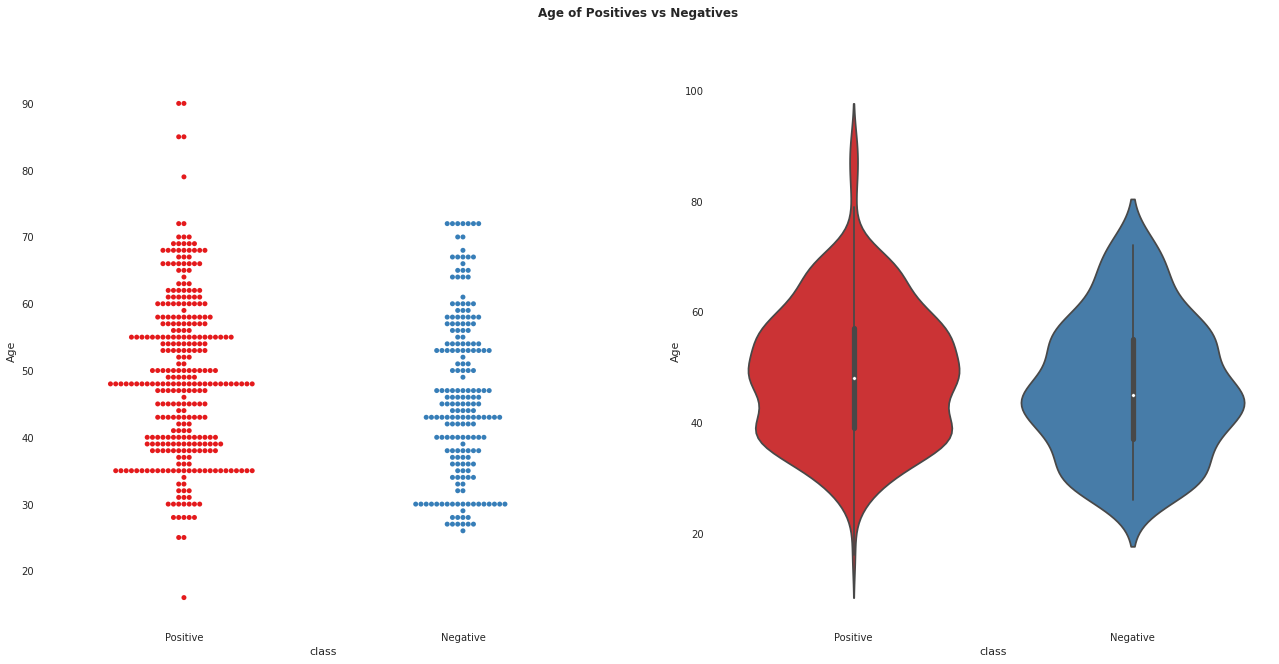

In [76]:
f,ax=plt.subplots(1,2,figsize=(22,10))
#sns.stripplot(x="class", y="Age", data=df, jitter=True, palette="Set1", ax=ax[0])

sns.swarmplot(x="class", y="Age",data=df, palette="Set1", ax=ax[0])
sns.violinplot(x="class", y="Age", data=df, palette="Set1", ax=ax[1])
f.suptitle('Age of Positives vs Negatives', fontweight="bold");



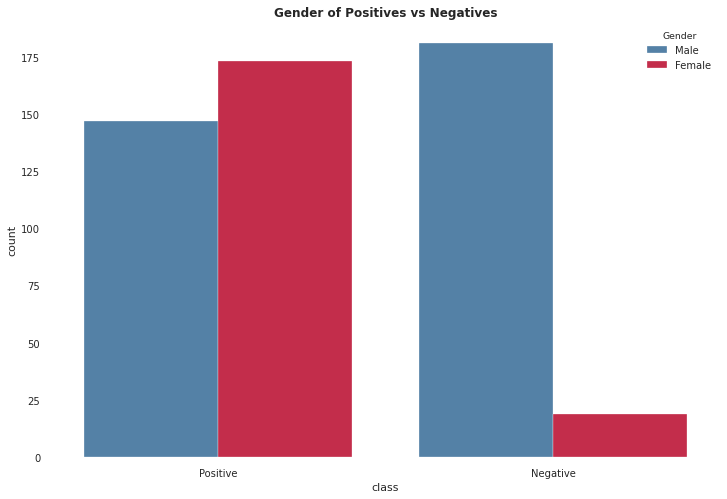

In [77]:
plt.figure(figsize=(12,8))
sns.countplot(x="class", hue="Gender", palette=['STEELBLUE','crimson'],data=df);
plt.title('Gender of Positives vs Negatives',fontweight="bold");

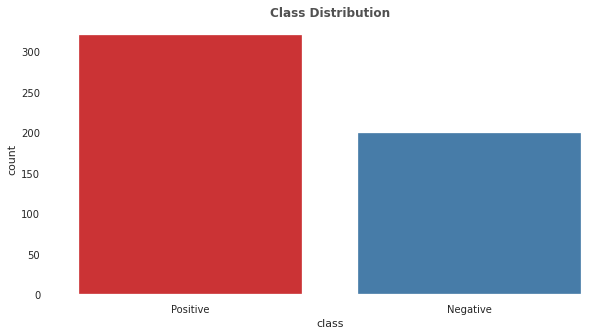

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['class'], palette='Set1');
plt.title('Class Distribution',fontweight="bold",alpha=0.8);

In [79]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden_weight_loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
Weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital_thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
Visual_blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


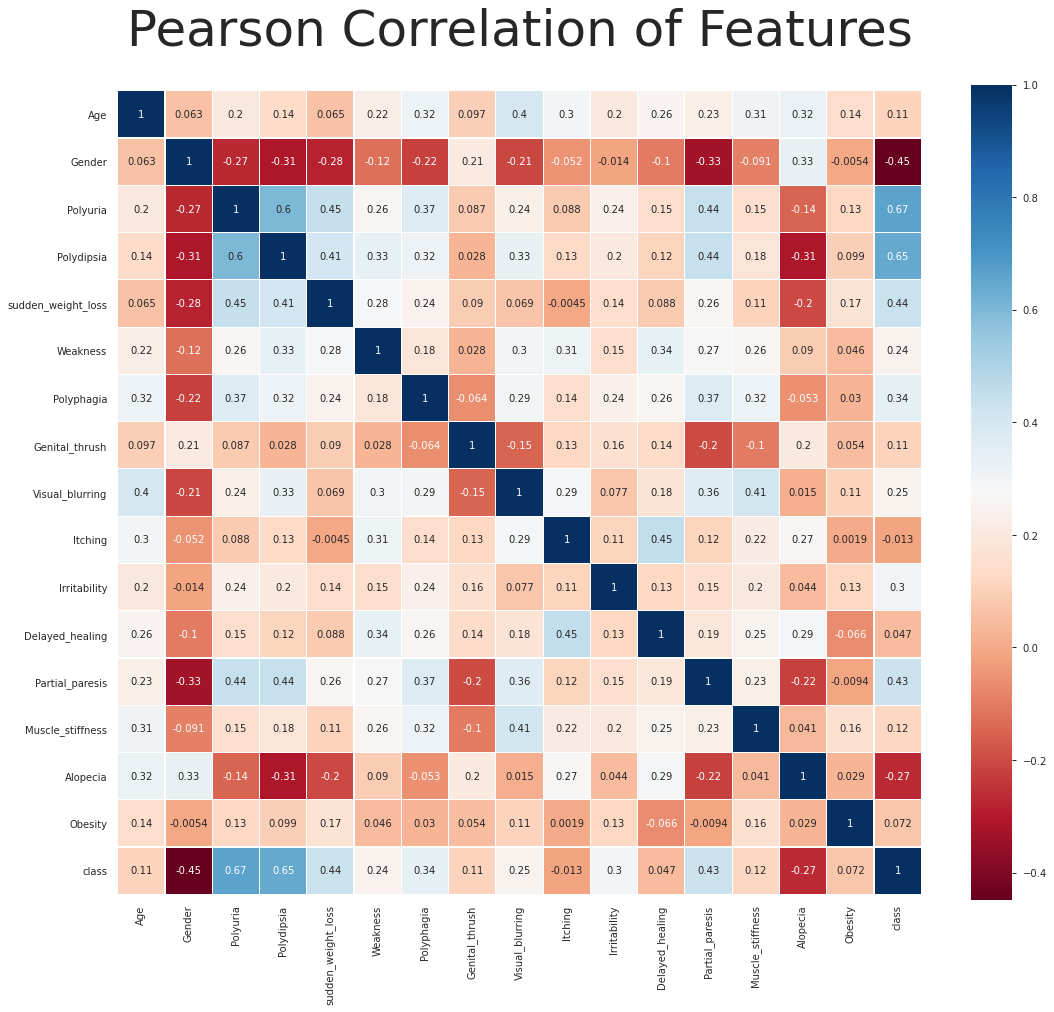

In [80]:
colormap = plt.cm.RdBu
plt.figure(figsize=(18,15));
plt.title('Pearson Correlation of Features', y=1.05, size=50);
sns.heatmap(df.corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

# [Splitting data to training and validation set](http://)



In [81]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size=0.2,
                                                   random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (416, 16)
X_test:  (104, 16)
y_train:  (416,)
y_test:  (104,)


# [Training model without preprocessing techniques](http://)



In [82]:
from sklearn.model_selection import KFold
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))

results = []
names = []

for name, model in models:
    Kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

 LR : 0.918409 (0.041443)
 LDA : 0.877584 (0.044196)
 KNN : 0.858362 (0.057952)
 NB : 0.875261 (0.053224)
 SVM : 0.615447 (0.061106)



# [Improve Performance with Ensembles](http://)



In [83]:
models = []
models.append(( 'Adab' , AdaBoostClassifier()))
models.append(( 'Bagging' , BaggingClassifier()))
models.append(( 'GBC' , GradientBoostingClassifier()))
models.append(( 'RF' , RandomForestClassifier()))


results = []
names = []

for name, model in models:
    Kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

Adab: 0.925610 (0.045714)
Bagging: 0.959466 (0.043945)
GBC: 0.976074 (0.026190)
RF: 0.978513 (0.024864)


# [Parameter tuning](http://)

In [84]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


model = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,20,50,100],
    'max_features': ['auto', 'sqrt', 'log2']
}

kfold = KFold(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.983275 using {'max_features': 'auto', 'n_estimators': 50}


In [85]:
RF = RandomForestClassifier(max_features='auto', n_estimators=50).fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9807692307692307


# [Confusion Matrix](http://)

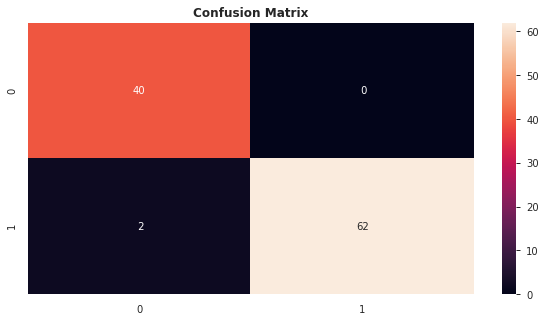

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f');
plt.title("Confusion Matrix",fontweight="bold");

# [Classification Report](http://)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



# [Reference](http://)

* https://en.wikipedia.org/wiki/Diabetes
* https://www.who.int/health-topics/diabetes#tab=tab_1
* https://www.medicalnewstoday.com/articles/323185
* https://www.diabetes.org/diabetes/type-1/symptoms
* https://www.medicinenet.com/diabetes_symptoms_in_men/article.htm